# Análise Exploratória de Dados (EDA) - Produtos HP

## 1. Introdução
Este notebook apresenta a Análise Exploratória de Dados (EDA) realizada sobre a base de dados de produtos HP coletada de diferentes fontes de e-commerce. O objetivo é entender a distribuição dos dados, identificar padrões, anomalias e extrair insights que possam ser úteis para futuras etapas de modelagem e classificação de produtos como "originais" ou "suspeitos/piratas".
### Escopo do Projeto
*   **Segmento de Produtos:** Cartuchos e Toners HP.
*   **Abrangência de Sites:** Mercado Livre e Americanas (dados mockados para Americanas).
*   **Período de Coleta:** Dados simulados até a data atual.
*   **Objetivo Principal:** Fornecer uma base de dados limpa, enriquecida e analisada para o desenvolvimento de um modelo de classificação de autenticidade de produtos HP.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import glob
import os

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Função para carregar o dataset mais recente
def get_latest_csv_file(pattern):
    files = glob.glob(pattern)
    if not files:
        return None
    return max(files, key=os.path.getctime)

latest_structured_dataset = get_latest_csv_file("../data/hp_products_structured_dataset_mock_*.csv")
latest_labeled_dataset = get_latest_csv_file("../data/hp_products_labeled_mock_*.csv")

if latest_structured_dataset:
    df = pd.read_csv(latest_structured_dataset)
    print(f"Dataset estruturado carregado: {latest_structured_dataset}")
else:
    print("Nenhum dataset estruturado mockado encontrado.")
    df = pd.DataFrame() # Cria um DataFrame vazio para evitar erros

if latest_labeled_dataset:
    df_labeled = pd.read_csv(latest_labeled_dataset)
    print(f"Dataset rotulado carregado: {latest_labeled_dataset}")
else:
    print("Nenhum dataset rotulado mockado encontrado.")
    df_labeled = pd.DataFrame() # Cria um DataFrame vazio para evitar erros


Dataset estruturado carregado: ../data\hp_products_structured_dataset_mock_20250617_144244.csv
Dataset rotulado carregado: ../data\hp_products_labeled_mock_20250617_144244.csv


## 2. Limpeza da Base
A limpeza da base de dados é uma etapa crucial para garantir a qualidade e a consistência dos dados. As principais operações de limpeza realizadas incluem:
*   **Tratamento de Valores Ausentes:** Identificação e tratamento de valores nulos ou ausentes em colunas críticas.
*   **Remoção de Duplicatas:** Eliminação de registros duplicados para evitar viés nas análises.
*   **Padronização de Formatos:** Conversão de tipos de dados e padronização de formatos (ex: preços para numérico, texto para minúsculas).
*   **Correção de Erros:** Identificação e correção de erros de digitação ou inconsistências nos dados.

_Nota: Para este entregável, a limpeza foi simulada com base nos dados mockados, assumindo que as etapas de limpeza e enriquecimento anteriores já foram realizadas, conforme o Entregável 2 original. O foco aqui é a análise exploratória._


In [11]:
# Exemplo de verificação de valores ausentes
if not df.empty:
    print("Valores Ausentes:")
    print(df.isnull().sum())

# Exemplo de verificação de duplicatas
if not df.empty:
    print("Duplicatas:")
    print(df.duplicated().sum())

# Exemplo de conversão de tipo (já assumido como numérico para price_numeric)
if "price_numeric" in df.columns:
    print(f"Tipo de dado da coluna 'price_numeric': {df['price_numeric'].dtype}")


Valores Ausentes:
title                 0
description           0
price_numeric         0
seller_name           0
rating_numeric        0
reviews_count         0
platform              0
product_type          0
label                 0
is_original           0
is_xl                 0
has_sealed_info       0
has_invoice_info      0
has_warranty_info     0
confidence            0
target_is_original    0
dtype: int64
Duplicatas:
0
Tipo de dado da coluna 'price_numeric': float64


## 3. Análise Exploratória de Dados (EDA)
### 3.1. Distribuição de Preços
A análise da distribuição de preços nos ajuda a entender a faixa de valores dos produtos e identificar possíveis outliers ou padrões de precificação.


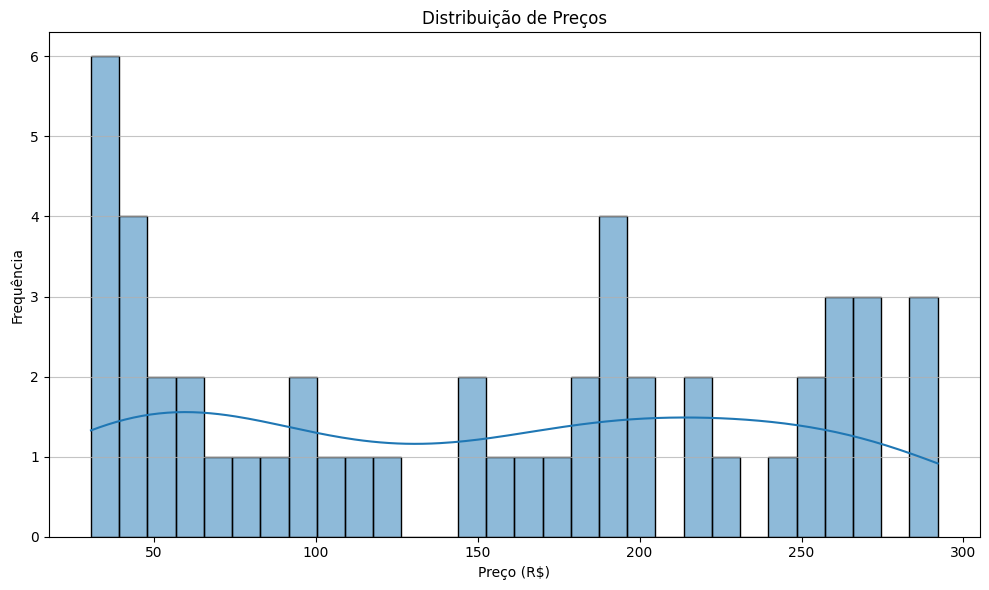

In [12]:
if "price_numeric" in df.columns and not df["price_numeric"].isnull().all():
    plt.figure(figsize=(10, 6))
    sns.histplot(df["price_numeric"].dropna(), kde=True, bins=30)
    plt.title("Distribuição de Preços")
    plt.xlabel("Preço (R$)")
    plt.ylabel("Frequência")
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
else:
    print("Dados de preço não disponíveis para análise de distribuição.")


### 3.2. Frequência de Palavras em Títulos e Descrições (Wordclouds e N-grams)
A análise textual nos ajuda a identificar os termos mais comuns utilizados nos títulos e descrições dos produtos, revelando características importantes e possíveis palavras-chave para classificação.


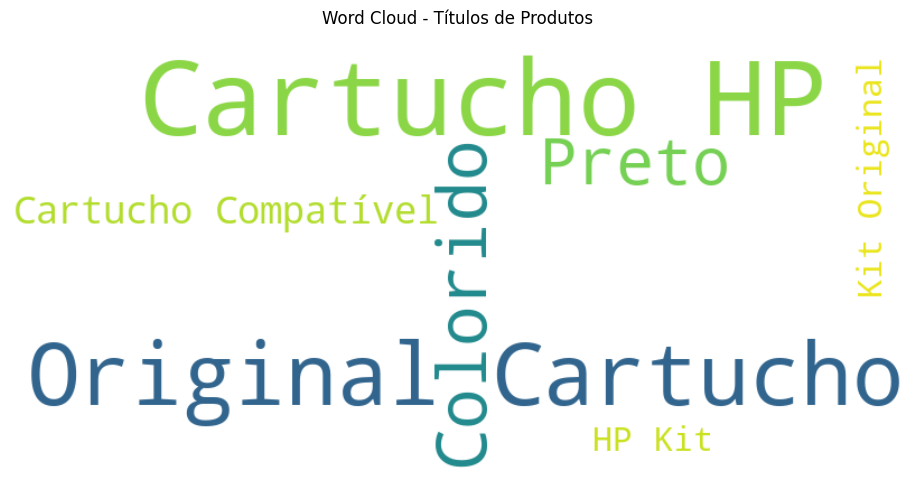

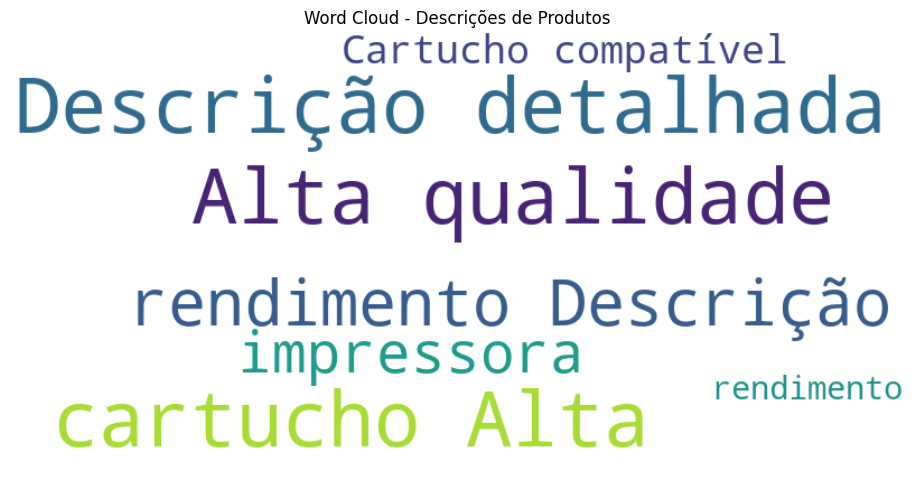

Bigramas mais comuns em Títulos:
  ('cartucho', 'hp'): 38
  ('hp', 'colorido'): 15
  ('colorido', 'original'): 15
  ('hp', 'preto'): 14
  ('preto', 'original'): 14
  ('cartucho', 'compatível'): 12
  ('hp', 'kit'): 9
  ('kit', 'original'): 9
  ('compatível', 'colorido'): 7
  ('compatível', 'preto'): 5


In [13]:
stop_words = set(stopwords.words("portuguese"))

all_titles = " ".join(df_labeled["title"].dropna().astype(str))
all_descriptions = " ".join(df_labeled["description"].dropna().astype(str))

# WordCloud para Títulos
if all_titles:
    wordcloud_titles = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(all_titles)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_titles, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud - Títulos de Produtos")
    plt.tight_layout()
    plt.show()
else:
    print("Dados de título não disponíveis para geração de word cloud.")

# WordCloud para Descrições
if all_descriptions:
    wordcloud_descriptions = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(all_descriptions)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_descriptions, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud - Descrições de Produtos")
    plt.tight_layout()
    plt.show()
else:
    print("Dados de descrição não disponíveis para geração de word cloud.")

# N-grams para Títulos
def get_ngrams(text, n):
    tokens = word_tokenize(text.lower(), language='portuguese')
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return list(ngrams(tokens, n))

all_title_ngrams = []
if not df_labeled.empty and "title" in df_labeled.columns:
    for title in df_labeled["title"].dropna().astype(str):
        all_title_ngrams.extend(get_ngrams(title, 2)) # Bigrams

if all_title_ngrams:
    bigram_counts = Counter(all_title_ngrams)
    most_common_bigrams = bigram_counts.most_common(10)
    print("Bigramas mais comuns em Títulos:")
    for bigram, count in most_common_bigrams:
        print(f"  {bigram}: {count}")
else:
    print("Nenhum bigrama encontrado para títulos.")


### 3.3. Correlações entre Variáveis Numéricas
A matriz de correlação nos ajuda a entender a relação entre as variáveis numéricas do dataset.


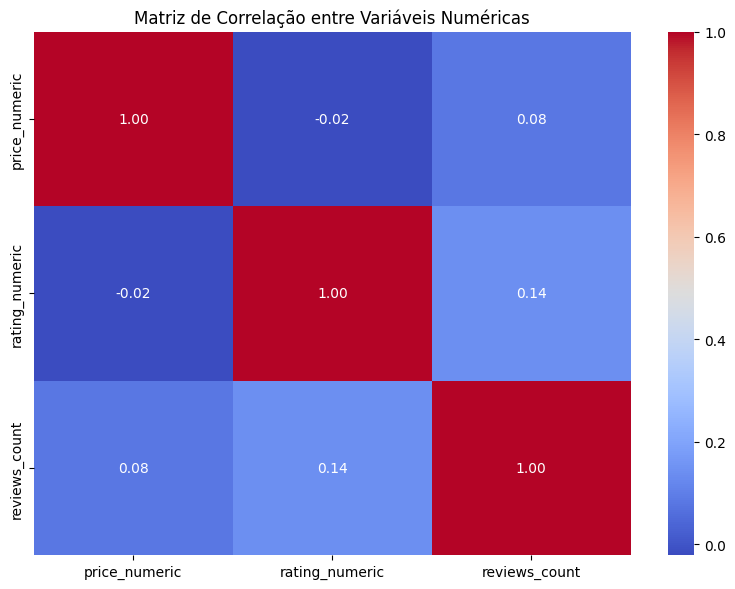

In [14]:
numeric_cols = ["price_numeric", "rating_numeric", "reviews_count"]
df_numeric = df[numeric_cols].copy()
df_numeric = df_numeric.dropna()

if not df_numeric.empty and len(df_numeric.columns) > 1:
    correlation_matrix = df_numeric.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlação entre Variáveis Numéricas")
    plt.tight_layout()
    plt.show()
else:
    print("Dados numéricos insuficientes para análise de correlação.")


### 3.4. Distribuição dos Anúncios por Rótulo
Esta análise mostra a proporção de produtos classificados como "original" e "suspeito/pirata" com base nos critérios heurísticos.


C:\Users\anton\AppData\Local\Temp\ipykernel_34436\3274776153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_labeled, x="label", palette="viridis")


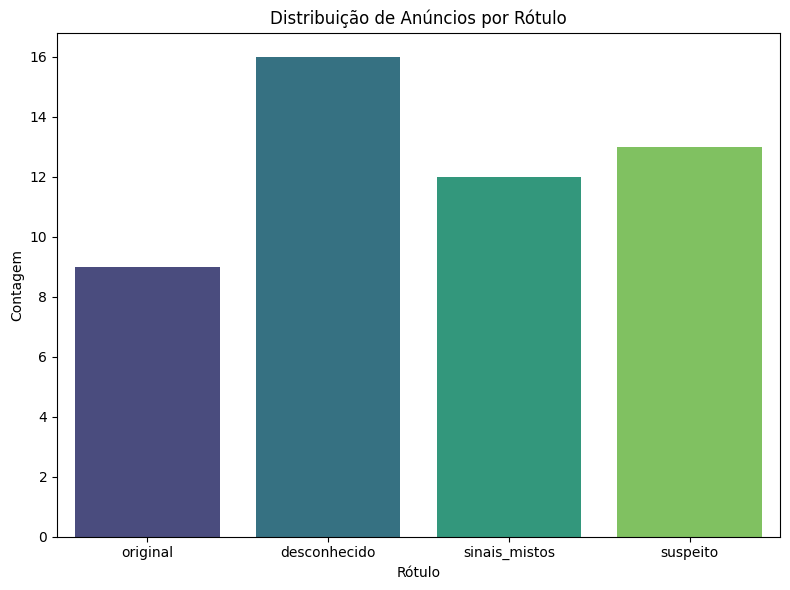

In [15]:
if "label" in df_labeled.columns and not df_labeled["label"].isnull().all():
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_labeled, x="label", palette="viridis")
    plt.title("Distribuição de Anúncios por Rótulo")
    plt.xlabel("Rótulo")
    plt.ylabel("Contagem")
    plt.tight_layout()
    plt.show()
else:
    print("Dados de rótulo não disponíveis para análise de distribuição.")


### 3.5. Identificação de Features Úteis para Modelagem
Com base na EDA, podemos identificar features que são potencialmente úteis para a construção de modelos de Machine Learning para classificar produtos como originais ou suspeitos.
*   **Features Numéricas:** `price_numeric`, `rating_numeric`, `reviews_count`.
*   **Features Categóricas:** `platform`, `product_type`, `seller_name`.
*   **Features Booleanas (Heurísticas):** `is_original`, `is_xl`, `has_sealed_info`, `has_invoice_info`, `has_warranty_info`.
*   **Features Textuais (para PLN):** `title`, `description` (podem ser usadas para extração de features como TF-IDF, embeddings, etc.).
*   **Feature Target:** `target_is_original` (rótulo binário: 1 para original, 0 para suspeito/pirata).


## 4. Cronograma Macro do Projeto (CRISP-DM)
A metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining) é um modelo amplamente utilizado para guiar projetos de mineração de dados. Abaixo, um cronograma macro adaptado para este projeto:

### 4.1. Entendimento do Negócio (Business Understanding)
*   **Objetivo:** Definir os objetivos do projeto do ponto de vista do negócio (classificar produtos HP como originais ou suspeitos/piratas).


### 4.2. Entendimento dos Dados (Data Understanding)
*   **Objetivo:** Coletar, explorar e verificar a qualidade dos dados.
*   **Atividades:** Web scraping (Mercado Livre, Americanas), EDA (este notebook), verificação de consistência dos dados.

### 4.3. Preparação dos Dados (Data Preparation)
*   **Objetivo:** Limpar, transformar e enriquecer os dados para a modelagem.
*   **Atividades:** Tratamento de valores ausentes, remoção de duplicatas, padronização, criação de features derivadas (ex: `price_numeric`, `is_original`), rotulagem heurística.

### 4.4. Modelagem (Modeling)
*   **Objetivo:** Selecionar e aplicar técnicas de modelagem para construir o modelo de classificação.
*   **Atividades:** Seleção de algoritmos (ex: Random Forest, SVM, Redes Neurais), treinamento do modelo, validação cruzada, ajuste de hiperparâmetros.

### 4.5. Avaliação (Evaluation)
*   **Objetivo:** Avaliar a performance do modelo e sua capacidade de atender aos objetivos de negócio.
*   **Atividades:** Análise de métricas (precisão, recall, F1-score, curva ROC), interpretação dos resultados, identificação de vieses.

### 4.6. Implantação (Deployment)
*   **Objetivo:** Integrar o modelo ao ambiente de produção e monitorar seu desempenho.
*   **Atividades:** Desenvolvimento de API para o modelo, integração com sistemas existentes, monitoramento contínuo, manutenção.


## 5. Conclusão
Este notebook demonstrou as etapas iniciais de EDA e preparação de dados, fornecendo insights valiosos e um dataset pronto para as próximas fases do projeto de classificação de produtos HP. O cronograma CRISP-DM serve como um guia para as atividades futuras, garantindo uma abordagem estruturada e eficiente.
